In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Daten laden
file_path = "data/edited_file.csv"
df = pd.read_csv(file_path)

df = df.dropna()

# Daten vorverarbeiten
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [5]:
# Feature-Auswahl
features = ['Severity']
X = df[features]

# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clusteranalyse
n_clusters = 4  # Anzahl der Cluster (kann angepasst werden)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Vinko Jelic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Zentroide:
[[2.]
 [4.]
 [3.]
 [1.]]


C:\Users\Vinko Jelic\AppData\Local\Temp\ipykernel_11948\3610493401.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Severity', y='Cluster', data=df, palette='viridis')


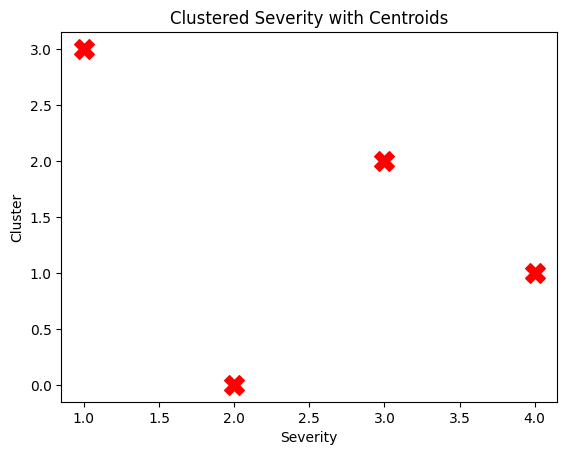

In [6]:
# Zentroide abrufen
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Zentroide:")
print(centroids)

# Visualisierung
sns.scatterplot(x='Severity', y='Cluster', data=df, palette='viridis')
plt.scatter(centroids[:, 0], range(n_clusters), marker='X', s=200, color='red')  # Zentroide als rote X markieren
plt.title('Clustered Severity with Centroids')
plt.show()